In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime 

from keras.models import Sequential
from keras.layers import Dense, Activation,Dropout
from keras.layers.recurrent import LSTM

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.utils import shuffle

import warnings
warnings.filterwarnings('ignore')

sns.set()

Using TensorFlow backend.


In [2]:
df = pd.read_csv('Foreign_Exchange_Rates.csv', na_values='ND')

In [3]:
df.head(10)

,Unnamed: 0,Time Serie,AUSTRALIA - AUSTRALIAN DOLLAR/US$,EURO AREA - EURO/US$,NEW ZEALAND - NEW ZELAND DOLLAR/US$,UNITED KINGDOM - UNITED KINGDOM POUND/US$,BRAZIL - REAL/US$,CANADA - CANADIAN DOLLAR/US$,CHINA - YUAN/US$,HONG KONG - HONG KONG DOLLAR/US$,...,SINGAPORE - SINGAPORE DOLLAR/US$,DENMARK - DANISH KRONE/US$,JAPAN - YEN/US$,MALAYSIA - RINGGIT/US$,NORWAY - NORWEGIAN KRONE/US$,SWEDEN - KRONA/US$,SRI LANKA - SRI LANKAN RUPEE/US$,SWITZERLAND - FRANC/US$,TAIWAN - NEW TAIWAN DOLLAR/US$,THAILAND - BAHT/US$
0,0,03-01-00,1.5172,0.9847,1.9033,0.6146,1.8050,1.4465,8.2798,7.7765,...,1.6563,7.3290,101.70,3.8,7.9640,8.4430,72.30,1.5808,31.38,36.97
1,1,04-01-00,1.5239,0.9700,1.9238,0.6109,1.8405,1.4518,8.2799,7.7775,...,1.6535,7.2180,103.09,3.8,7.9340,8.3600,72.65,1.5565,30.60,37.13
2,2,05-01-00,1.5267,0.9676,1.9339,0.6092,1.8560,1.4518,8.2798,7.7780,...,1.6560,7.2080,103.77,3.8,7.9350,8.3530,72.95,1.5526,30.80,37.10
3,3,06-01-00,1.5291,0.9686,1.9436,0.6070,1.8400,1.4571,8.2797,7.7785,...,1.6655,7.2125,105.19,3.8,7.9400,8.3675,72.95,1.5540,31.75,37.62
4,4,07-01-00,1.5272,0.9714,1.9380,0.6104,1.8310,1.4505,8.2794,7.7783,...,1.6625,7.2285,105.17,3.8,7.9660,8.4150,73.15,1.5623,30.85,37.30
5,5,10-01-00,1.5242,0.9754,1.9350,0.6107,1.8190,1.4568,8.2794,7.7785,...,1.6618,7.2540,105.28,3.8,8.0240,8.4490,73.30,1.5704,30.83,37.27
6,6,11-01-00,1.5209,0.9688,1.9365,0.6068,1.8225,1.4570,8.2795,7.7785,...,1.6690,7.2140,106.09,3.8,7.9690,8.3970,73.35,1.5605,30.83,37.61
7,7,12-01-00,1.5202,0.9727,1.9286,0.6073,1.8350,1.4550,8.2796,7.7787,...,1.6690,7.2360,105.76,3.8,7.9770,8.4180,73.35,1.5660,30.80,37.54
8,8,13-01-00,1.4954,0.9737,1.9084,0.6067,1.8140,1.4495,8.2798,7.7788,...,1.6700,7.2520,106.09,3.8,7.9425,8.4170,73.35,1.5707,30.80,37.49
9,9,14-01-00,1.5004,0.9874,1.9186,0.6115,1.8050,1.4497,8.2797,7.7789,...,1.6752,7.3470,105.86,3.8,7.9970,8.4740,73.35,1.5945,30.83,37.55


In [4]:
df.tail(10)

,Unnamed: 0,Time Serie,AUSTRALIA - AUSTRALIAN DOLLAR/US$,EURO AREA - EURO/US$,NEW ZEALAND - NEW ZELAND DOLLAR/US$,UNITED KINGDOM - UNITED KINGDOM POUND/US$,BRAZIL - REAL/US$,CANADA - CANADIAN DOLLAR/US$,CHINA - YUAN/US$,HONG KONG - HONG KONG DOLLAR/US$,...,SINGAPORE - SINGAPORE DOLLAR/US$,DENMARK - DANISH KRONE/US$,JAPAN - YEN/US$,MALAYSIA - RINGGIT/US$,NORWAY - NORWEGIAN KRONE/US$,SWEDEN - KRONA/US$,SRI LANKA - SRI LANKAN RUPEE/US$,SWITZERLAND - FRANC/US$,TAIWAN - NEW TAIWAN DOLLAR/US$,THAILAND - BAHT/US$
5207,5207,18-12-19,1.4590,0.8998,1.5202,0.7646,4.0624,1.3117,7.0029,7.7867,...,1.3552,6.7240,109.58,4.1378,9.0203,9.4203,181.10,0.9819,30.15,30.20
5208,5208,19-12-19,1.4520,0.8986,1.5135,0.7672,4.0580,1.3122,7.0097,7.7955,...,1.3546,6.7148,109.23,4.1400,8.9619,9.4211,181.40,0.9777,30.16,30.19
5209,5209,20-12-19,1.4489,0.9029,1.5135,0.7671,4.0859,1.3170,7.0063,7.7969,...,1.3550,6.7443,109.45,4.1385,8.9673,9.4111,181.00,0.9824,30.14,30.19
5210,5210,23-12-19,1.4457,0.9016,1.5088,0.7742,4.0621,1.3167,7.0124,7.7850,...,1.3562,6.7356,109.39,4.1415,8.9470,9.4295,181.25,0.9820,30.14,30.16
5211,5211,24-12-19,1.4445,0.9022,1.5058,0.7719,4.0833,1.3160,7.0064,7.7872,...,1.3550,6.7399,109.38,4.1350,8.9142,9.4133,181.30,0.9807,30.14,30.15
5212,5212,25-12-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5213,5213,26-12-19,1.4411,0.9007,1.5002,0.7688,4.0602,1.3124,6.9949,7.7880,...,1.3540,6.7295,109.67,4.1337,8.8799,9.4108,181.30,0.9808,30.11,30.15
5214,5214,27-12-19,1.4331,0.8949,1.4919,0.7639,4.0507,1.3073,6.9954,7.7874,...,1.3520,6.6829,109.47,4.1260,8.8291,9.3405,181.35,0.9741,30.09,30.14
5215,5215,30-12-19,1.4278,0.8915,1.4846,0.7610,4.0152,1.3058,6.9864,7.7857,...,1.3483,6.6589,108.85,4.1053,8.7839,9.3145,181.60,0.9677,30.04,29.94
5216,5216,31-12-19,1.4225,0.8907,1.4826,0.7536,4.0190,1.2962,6.9618,7.7894,...,1.3446,6.6554,108.67,4.0918,8.7823,9.3425,181.30,0.9677,29.91,29.75


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5217 entries, 0 to 5216
Data columns (total 24 columns):
Unnamed: 0                                   5217 non-null int64
Time Serie                                   5217 non-null object
AUSTRALIA - AUSTRALIAN DOLLAR/US$            5019 non-null float64
EURO AREA - EURO/US$                         5019 non-null float64
NEW ZEALAND - NEW ZELAND DOLLAR/US$          5019 non-null float64
UNITED KINGDOM - UNITED KINGDOM POUND/US$    5019 non-null float64
BRAZIL - REAL/US$                            5019 non-null float64
CANADA - CANADIAN DOLLAR/US$                 5019 non-null float64
CHINA - YUAN/US$                             5020 non-null float64
HONG KONG - HONG KONG DOLLAR/US$             5019 non-null float64
INDIA - INDIAN RUPEE/US$                     5018 non-null float64
KOREA - WON/US$                              5019 non-null float64
MEXICO - MEXICAN PESO/US$                    5019 non-null float64
SOUTH AFRICA - RAND/US$  

In [6]:
df.shape

(5217, 24)

In [7]:
df.describe()

,Unnamed: 0,AUSTRALIA - AUSTRALIAN DOLLAR/US$,EURO AREA - EURO/US$,NEW ZEALAND - NEW ZELAND DOLLAR/US$,UNITED KINGDOM - UNITED KINGDOM POUND/US$,BRAZIL - REAL/US$,CANADA - CANADIAN DOLLAR/US$,CHINA - YUAN/US$,HONG KONG - HONG KONG DOLLAR/US$,INDIA - INDIAN RUPEE/US$,...,SINGAPORE - SINGAPORE DOLLAR/US$,DENMARK - DANISH KRONE/US$,JAPAN - YEN/US$,MALAYSIA - RINGGIT/US$,NORWAY - NORWEGIAN KRONE/US$,SWEDEN - KRONA/US$,SRI LANKA - SRI LANKAN RUPEE/US$,SWITZERLAND - FRANC/US$,TAIWAN - NEW TAIWAN DOLLAR/US$,THAILAND - BAHT/US$
count,5217.000000,5019.000000,5019.000000,5019.000000,5019.000000,5019.000000,5019.000000,5020.000000,5019.000000,5018.000000,...,5019.000000,5019.000000,5019.000000,5019.000000,5019.000000,5019.000000,5019.000000,5019.000000,5016.000000,5019.000000
mean,2608.000000,1.332015,0.843904,1.543683,0.640372,2.547928,1.230338,7.200820,7.782638,52.718519,...,1.480398,6.285997,106.590122,3.650950,7.074850,7.898923,119.111287,1.150461,31.764884,35.519862
std,1506.162508,0.269918,0.126836,0.337318,0.082611,0.724216,0.182160,0.820150,0.027544,9.680986,...,0.188932,0.943508,13.210090,0.378539,1.226937,1.201860,25.342679,0.249052,1.671010,4.563073
min,0.000000,0.906900,0.624600,1.134600,0.473800,1.537500,0.916800,6.040200,7.708500,38.480000,...,1.200700,4.660500,75.720000,2.937000,4.946700,5.834600,72.300000,0.729600,28.500000,28.600000
25%,1304.000000,1.115200,0.750800,1.323800,0.587400,1.945100,1.055700,6.475775,7.756400,45.250000,...,1.342950,5.592750,100.080000,3.291500,5.996350,6.852350,100.400000,0.966800,30.350000,31.780000
50%,2608.000000,1.311000,0.815600,1.442400,0.636400,2.328800,1.237000,6.860050,7.780600,48.090000,...,1.408500,6.071700,109.020000,3.800000,6.784000,7.747800,112.300000,1.040400,31.730000,34.000000
75%,3912.000000,1.430200,0.900100,1.591100,0.692350,3.129900,1.335700,8.276500,7.799800,62.432500,...,1.679150,6.714500,116.815000,3.800000,8.278200,8.743600,132.600000,1.269050,32.980000,39.405000
max,5216.000000,2.071300,1.209200,2.551000,0.828700,4.259400,1.612800,8.280000,7.849900,74.330000,...,1.854000,9.005000,134.770000,4.496000,9.589000,11.027000,182.800000,1.825000,35.210000,45.820000


In [9]:
df.isnull().sum()

Unnamed: 0                                     0
Time Serie                                     0
AUSTRALIA - AUSTRALIAN DOLLAR/US$            198
EURO AREA - EURO/US$                         198
NEW ZEALAND - NEW ZELAND DOLLAR/US$          198
UNITED KINGDOM - UNITED KINGDOM POUND/US$    198
BRAZIL - REAL/US$                            198
CANADA - CANADIAN DOLLAR/US$                 198
CHINA - YUAN/US$                             197
HONG KONG - HONG KONG DOLLAR/US$             198
INDIA - INDIAN RUPEE/US$                     199
KOREA - WON/US$                              198
MEXICO - MEXICAN PESO/US$                    198
SOUTH AFRICA - RAND/US$                      198
SINGAPORE - SINGAPORE DOLLAR/US$             198
DENMARK - DANISH KRONE/US$                   198
JAPAN - YEN/US$                              198
MALAYSIA - RINGGIT/US$                       198
NORWAY - NORWEGIAN KRONE/US$                 198
SWEDEN - KRONA/US$                           198
SRI LANKA - SRI LANK

In [10]:
df.interpolate(inplace = True)
df.isnull().sum()

Unnamed: 0                                   0
Time Serie                                   0
AUSTRALIA - AUSTRALIAN DOLLAR/US$            0
EURO AREA - EURO/US$                         0
NEW ZEALAND - NEW ZELAND DOLLAR/US$          0
UNITED KINGDOM - UNITED KINGDOM POUND/US$    0
BRAZIL - REAL/US$                            0
CANADA - CANADIAN DOLLAR/US$                 0
CHINA - YUAN/US$                             0
HONG KONG - HONG KONG DOLLAR/US$             0
INDIA - INDIAN RUPEE/US$                     0
KOREA - WON/US$                              0
MEXICO - MEXICAN PESO/US$                    0
SOUTH AFRICA - RAND/US$                      0
SINGAPORE - SINGAPORE DOLLAR/US$             0
DENMARK - DANISH KRONE/US$                   0
JAPAN - YEN/US$                              0
MALAYSIA - RINGGIT/US$                       0
NORWAY - NORWEGIAN KRONE/US$                 0
SWEDEN - KRONA/US$                           0
SRI LANKA - SRI LANKAN RUPEE/US$             0
SWITZERLAND -

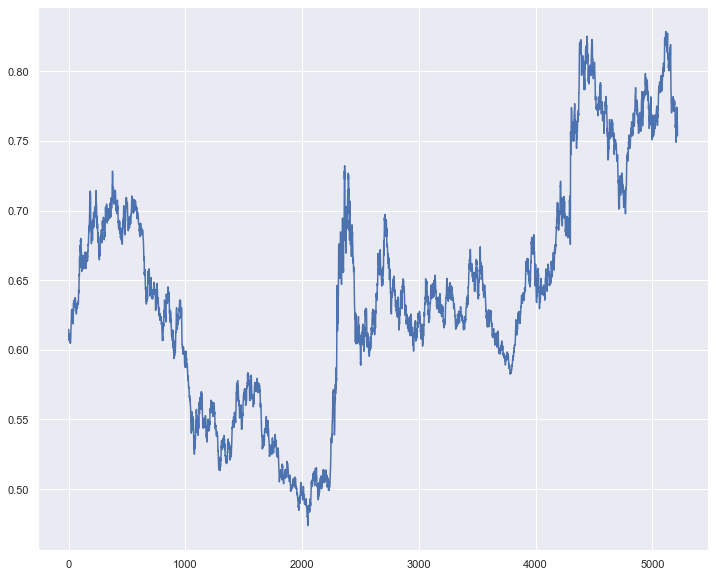

In [11]:
plt.figure(figsize = (12,10))
plt.plot(df['UNITED KINGDOM - UNITED KINGDOM POUND/US$'])

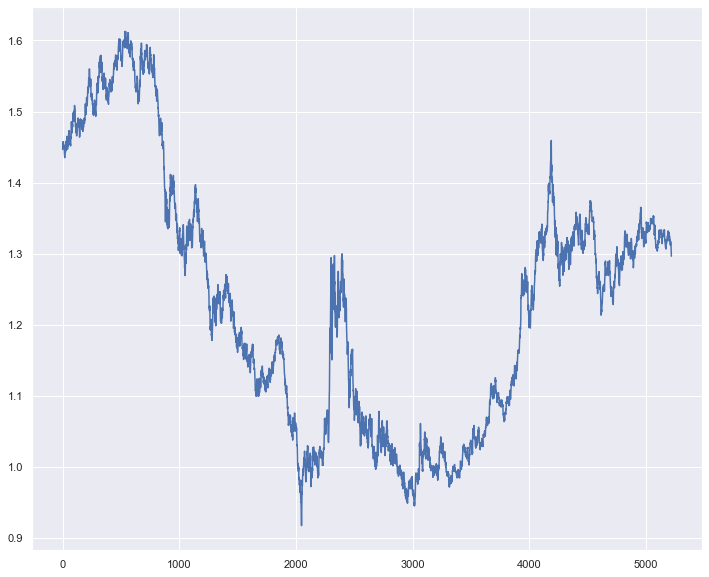

In [12]:
plt.figure(figsize = (12,10))
plt.plot(df['CANADA - CANADIAN DOLLAR/US$'])

In [13]:
fxr = df['CANADA - CANADIAN DOLLAR/US$']
fxr

0       1.4465
1       1.4518
2       1.4518
3       1.4571
4       1.4505
         ...  
5212    1.3142
5213    1.3124
5214    1.3073
5215    1.3058
5216    1.2962
Name: CANADA - CANADIAN DOLLAR/US$, Length: 5217, dtype: float64

In [14]:
fxr = np.array(fxr).reshape(-1,1)
fxr

array([[1.4465],
       [1.4518],
       [1.4518],
       ...,
       [1.3073],
       [1.3058],
       [1.2962]])

In [15]:
#Standardization
sc = MinMaxScaler()
fxr = sc.fit_transform(fxr)
fxr

array([[0.76106322],
       [0.76867816],
       [0.76867816],
       ...,
       [0.56106322],
       [0.55890805],
       [0.54511494]])

In [16]:
#Splitting dataaa into train and test
train = fxr[0:4800]
test = fxr[4800:]
train.shape,test.shape

((4800, 1), (417, 1))

In [17]:
def get_data(data, look_back):
    data_x,data_y = [], []
    for i in range (len(data)-look_back-1):
        data_x.append(data[i:(i+look_back),0])
        data_y.append(data([i+look_back,0]))
    return np.array(data_x), np.array(data_y)

In [20]:
look_back = 1
xtrain,ytrain = get_data(train, look_back)
xtrain.shape,ytrain.shape

((4798, 1), (4798,))

In [22]:
xtest,ytest = get_data(test,look_back)
xtest.shape, ytest.shape

((415, 1), (415,))

In [23]:
xtrain = xtrain.reshape(xtrain.shape[0],xtrain.shape[1],1)
xtest = xtest.reshape(xtest.shape[0],xtest.shape[1], 1)
xtrain.shape, xtest.shape

((4798, 1, 1), (415, 1, 1))

In [24]:
# Building Model
model = Sequential()
model.add(LSTM(5, activation='tanh', input_dim = 1))
model.add(Dense(1))

In [26]:
model.compile(optimizer = 'adam', loss ='mse')
model.fit(xtrain,ytrain, epochs= 100, batch_size=1,verbose=1)

Epoch 1/100
4798/4798 [==============================] - 21s 4ms/step - loss: 0.0206
Epoch 2/100
4798/4798 [==============================] - ETA: 0s - loss: 1.2408e-0 - 17s 3ms/step - loss: 1.2419e-04
Epoch 3/100
4798/4798 [==============================] - 19s 4ms/step - loss: 1.2617e-04
Epoch 4/100
4798/4798 [==============================] - 16s 3ms/step - loss: 1.2405e-04
Epoch 5/100
4798/4798 [==============================] - 16s 3ms/step - loss: 1.2284e-04
Epoch 6/100
4798/4798 [==============================] - 16s 3ms/step - loss: 1.2279e-04
Epoch 7/100
4798/4798 [==============================] - 16s 3ms/step - loss: 1.2200e-04
Epoch 8/100
4798/4798 [==============================] - 16s 3ms/step - loss: 1.2013e-04
Epoch 9/100
4798/4798 [==============================] - 18s 4ms/step - loss: 1.2198e-04
Epoch 10/100
4798/4798 [==============================] - 20s 4ms/step - loss: 1.1871e-04
Epoch 11/100
4798/4798 [==============================] - 17s 4ms/step - loss: 1.2001

4798/4798 [==============================] - 16s 3ms/step - loss: 1.1154e-04
Epoch 92/100
4798/4798 [==============================] - 16s 3ms/step - loss: 1.0958e-04
Epoch 93/100
4798/4798 [==============================] - 16s 3ms/step - loss: 1.1014e-04
Epoch 94/100
4798/4798 [==============================] - 16s 3ms/step - loss: 1.0940e-04
Epoch 95/100
4798/4798 [==============================] - 16s 3ms/step - loss: 1.1013e-04
Epoch 96/100
4798/4798 [==============================] - 16s 3ms/step - loss: 1.0951e-04
Epoch 97/100
4798/4798 [==============================] - 16s 3ms/step - loss: 1.0824e-04
Epoch 98/100
4798/4798 [==============================] - 16s 3ms/step - loss: 1.0852e-04
Epoch 99/100
4798/4798 [==============================] - 16s 3ms/step - loss: 1.0819e-04
Epoch 100/100
4798/4798 [==============================] - 16s 3ms/step - loss: 1.0987e-04


In [27]:
sc.scale_

array([1.43678161])

In [28]:
# Inverse Transformation of MinMaxScaler
prediction = model.predict(xtest)
prediction = sc.inverse_transform(prediction)
prediction[:20]

array([[1.2966222],
       [1.2993335],
       [1.281091 ],
       [1.2937133],
       [1.2915442],
       [1.2889804],
       [1.2974601],
       [1.2875012],
       [1.2954882],
       [1.2923331],
       [1.2946994],
       [1.2953897],
       [1.2930232],
       [1.3035727],
       [1.3131348],
       [1.3192458],
       [1.3225969],
       [1.3253565],
       [1.3281159],
       [1.3280175]], dtype=float32)

In [29]:
ytest = np.array(ytest).reshape(-1,1)
ytest = sc.inverse_transform(ytest)
ytest[:20]

array([[1.3027],
       [1.2842],
       [1.297 ],
       [1.2948],
       [1.2922],
       [1.3008],
       [1.2907],
       [1.2988],
       [1.2956],
       [1.298 ],
       [1.2987],
       [1.2963],
       [1.307 ],
       [1.3167],
       [1.3229],
       [1.3263],
       [1.3291],
       [1.3319],
       [1.3318],
       [1.3313]])

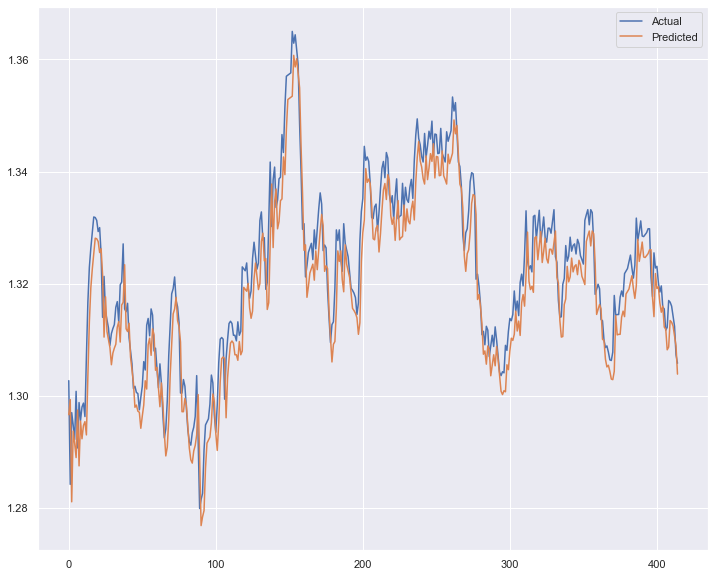

In [30]:
# Accuracy
plt.figure(figsize = (12,10))
plt.plot(ytest, label = 'Actual')
plt.plot(prediction, label = 'Predicted')
plt.legend()